# KNN Classification Example

In this Notebook, generates a synthetic dataset, trains a K-Nearest Neighbors (KNN) classifier on the data, predicts class labels for a test set, evaluates the model's accuracy, and visualizes the decision boundary using contour plots. This process demonstrates how to work with data, train a simple classification model, and visualize its performance.

1. **Import Libraries**: The code begins by importing the necessary libraries for data manipulation, visualization, and machine learning.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


2. **Load and Preprocess Data**: In this step, a synthetic dataset is generated using the `make_classification` function from scikit-learn's `datasets` module. It generates random samples with two informative features and no redundant features.


In [3]:
# Generate the synthetic dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)


The generated features are stored in the `X` variable, and the corresponding labels are stored in the `y` variable. Then, a pandas DataFrame called `data` is created with these features and labels.


In [15]:
# Create a DataFrame
data = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
data['Label'] = y

In [5]:
data.sample(8)

,Feature 1,Feature 2,Label
63,0.341294,0.573042,1
59,-1.132074,0.890759,0
5,-0.808045,1.196641,0
98,-1.158068,0.865620,0
60,-0.539630,-0.724280,0
32,-2.026321,0.061945,0
86,1.355370,1.155093,1
19,-2.171053,-0.048629,0


3. **Visualize Data**: The code creates a histogram of the features in the `data` DataFrame to visualize their distributions.


C:\Users\ayman\AppData\Local\Temp\ipykernel_3672\2383931128.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax=ax)


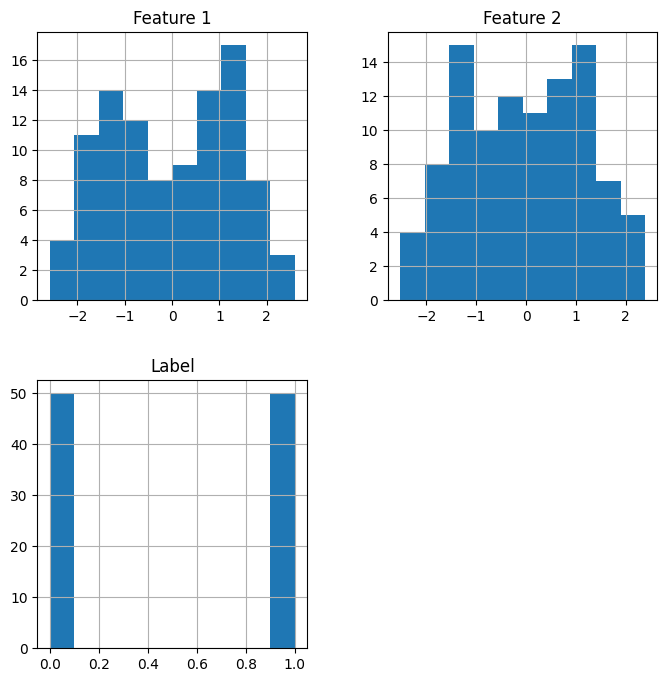

In [6]:
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
data.hist(ax=ax)
plt.show()

4. **Data Splitting**: The data is split into training and testing sets using the `train_test_split` function. 80% of the data is allocated for training and 20% for testing.


In [7]:
# preprocess the data
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5. **Create and Train KNN Model**: A K-Nearest Neighbors (KNN) classifier is created and trained using the training data.

 

In [8]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

6. **Make Predictions**: The trained KNN model is used to make predictions on the test data.

In [9]:
# Make predictions
y_pred = knn.predict(X_test)

In [10]:
y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0])

7. **Evaluate the Model**: The accuracy of the model's predictions is calculated and printed.


In [11]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.95


8. **Visualize Decision Boundary**: A meshgrid of feature values is created to visualize the decision boundary of the KNN model. Predicted class labels are assigned to each point in the meshgrid, and the meshgrid is used to create a contour plot of the decision boundary.

In [12]:
#  Visualize the results
# Create a meshgrid of feature values

h = 0.02  # Step size for meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [13]:
# Predict class labels for each point in the meshgrid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)




    Finally, the decision boundary and the data points are plotted using matplotlib.

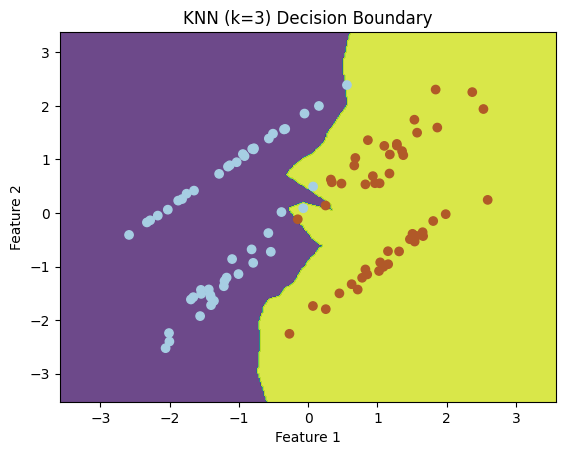

In [14]:
# Plot the decision boundary and data points
plt.figure()
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"KNN (k={k}) Decision Boundary")
plt.show()



This code snippet demonstrates the process of generating synthetic data, training a KNN classifier, making predictions, evaluating the model's accuracy, and visualizing the decision boundary.

<!-- Is code ka maqsad KNN model ki decision boundary ko tasawwur mein lay ker us ka contour plot banana hai. Is tareeqay se hum samajh saktay hain ke model kis tarah se alag alag regions mein classes ko separate karta hai.

1. **Meshgrid Banane ka Tareeqa**: Sab se pehle, feature values ki meshgrid banai jati hai jis se decision boundary ka tasawwur mil sake. Yeh meshgrid do dimensions (feature 1 aur feature 2) mein distribute hokar banta hai.

    ```python
    h = 0.02  # Meshgrid ke qadam ka size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    ```

2. **Meshgrid Mein Labels Ka Prediction**: Meshgrid ke har point ke liye predicted class labels assign kiye jatay hain. Yeh labels KNN model se hasil kiye jate hain.

    ```python
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ```

3. **Contour Plot Banane Ka Tareeqa**: Ab meshgrid aur us per assign kiye gaye labels se, decision boundary ka contour plot banaya jata hai. Is plot mein har area ki color alag hoti hai jis se classes ki separation nazar aati hai.

    ```python
    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(f"KNN (k={k}) Decision Boundary")
    plt.show()
    ```

Yeh code us KNN model ki decision boundary ko visual representation mein darust tareeqay se samjhane mein madadgar hai. Contour plot se hum dekh sakte hain ke model kis tarah se features ko dekhtay hue classes ko separate kar raha hai. -->

<!-- In dono lines mein, code x aur y dimensions ke liye feature space mein minimum aur maximum values tayyar kar raha hai. In lines ka maqsad KNN model ki decision boundary ko visualize karne ke liye meshgrid ki range mukarrar karna hai.

1. **x_min aur x_max ka Hisaab**: x dimension (feature 1) ke liye, code feature matrix `X` ke pehle column par `min()` aur `max()` functions istemal kar ke feature ki minimum value (`x_min`) aur maximum value (`x_max`) tayyar karta hai.

    ```python
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    ```

    `x_min` se 1 minus aur `x_max` mein 1 add karke, minimum aur maximum values ke aas-paas chhota sa faasla banaya jata hai taki data points khud visualize ki borders par na hon.

2. **y_min aur y_max ka Hisaab**: Usi tarah, y dimension (feature 2) ke liye, code feature matrix `X` ke dusre column par `min()` aur `max()` functions istemal kar ke feature ki minimum value (`y_min`) aur maximum value (`y_max`) tayyar karta hai.

    ```python
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    ```

    x dimension ke tarah, `y_min` se 1 minus aur `y_max` mein 1 add karke, data points ke aas-paas chhota sa faasla banaya jata hai.

Yeh lines yehi yaqeeni banate hain ke meshgrid jo `np.meshgrid()` function se banaya jayega, asal data points se thoda sa bara area cover karega. Yeh extra space decision boundary ko plot ke kenarein se door rakhne mein madad karti hai, taki boundary plot ki edges ke bohot qareeb na aaye.

-----------

Iss line `xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))`, ek meshgrid banaya ja raha hai jo x aur y ke values ko mukarrar hadood ke andar cover karega. Yeh meshgrid KNN model ki decision boundary ko tasawwur mein lane ke liye istemal hoga.

- `np.arange(x_min, x_max, h)` `x_min` se shuru ho kar har `h` ke faslay tak pohanchne wale values ka sequence banata hai. Yeh sequence values meshgrid ke points ki x-coordinates ko darust karta hai.

- `np.arange(y_min, y_max, h)` isi tarah y ke liye bhi sequence banata hai, jo meshgrid ke points ki y-coordinates darust karta hai.

- `np.meshgrid()` yeh x aur y ke sequences ko le kar her x-coordinate ko her y-coordinate ke sath jor kar ek grid of points banata hai. Hasil hone wale `xx` aur `yy` arrays meshgrid ke har point ki x aur y coordinates ko darust karte hain.

Toh ikhtisar mein, yeh code line ek meshgrid banata hai jis mein x aur y ke coordinates mukarrar hadood aur qadam ke teht har point ka tashbeeh karta hai. Yeh meshgrid har point ke liye class labels predict karne aur KNN model ki decision boundary ko tasawwur mein lane ke liye istemal hoga. -->